In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2


In [2]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]

In [6]:
class_names = train_data.classes

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets  

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Text(0.5, 1.0, '9')

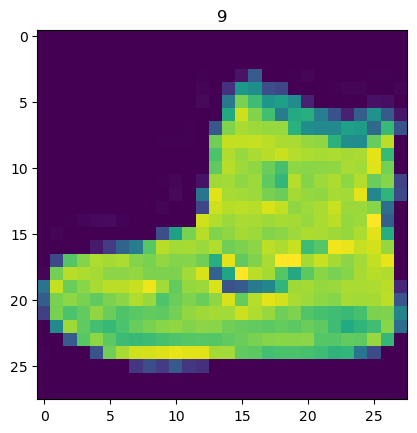

In [10]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

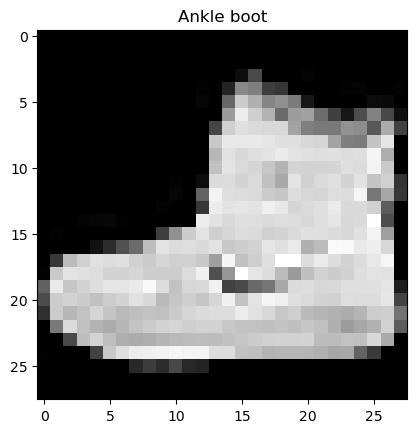

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

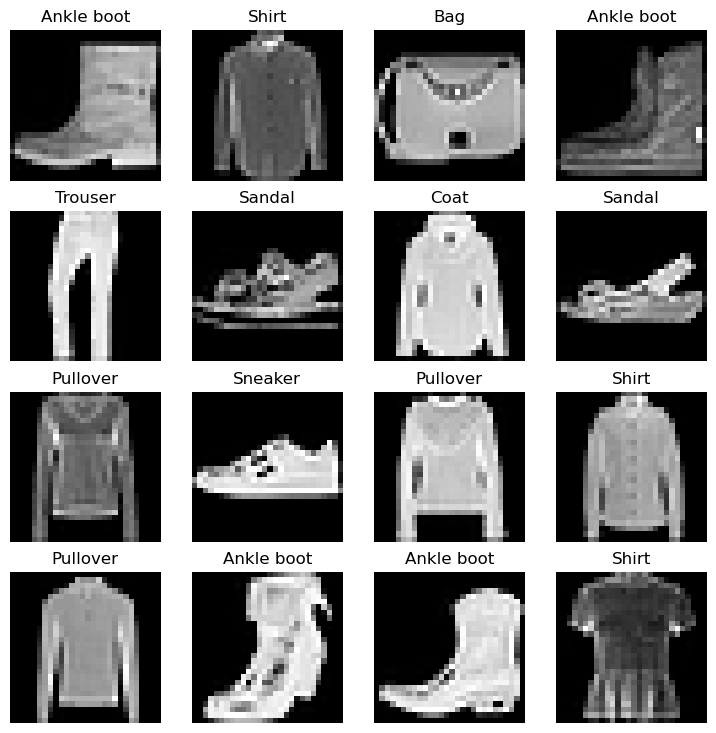

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)
    plt.title(class_names[label])

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x1c39f87e4a0>,
 <torch.utils.data.dataloader.DataLoader at 0x1c39fc06770>)

In [15]:
print(len(train_dataloader), len(test_dataloader))

1875 313


In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

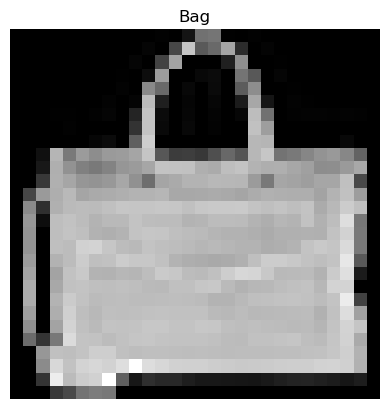

In [17]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)


In [18]:
flatten_model = nn.Flatten()
x= train_features_batch[0]
output = flatten_model(x)
print(x.shape)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [19]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack =nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
model_0.state_dict

<bound method Module.state_dict of FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)>

In [22]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("Exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

Exists


In [23]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
          

In [24]:

start_time=timer()
end_time=timer()
print_train_time(start=start_time, end=end_time, device=device)

Train time on cuda: 0.000 seconds


2.729997504502535e-05

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n------")
    train_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        if batch %400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    train_loss /= len(train_dataloader)
    
#     Testing
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))
        
    

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.9433 | Test loss: 0.6601, Test acc: 75.74
Epoch: 1 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5870 | Test loss: 0.5723, Test acc: 79.82
Epoch: 2 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5315 | Test loss: 0.5447, Test acc: 80.86
Epoch: 3 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5026 | Test loss: 0.5191, Test acc: 81.89
Epoch: 4 
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 sam

In [26]:
str(next(model_0.parameters()).device)

'cpu'

In [27]:

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.506369948387146,
 'model_acc': 82.15854632587859}

In [28]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack =nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )
    def forward(self, x):
        return self.layer_stack(x)



In [29]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784,10,len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in tqdm(enumerate(data_loader)):
    # Put data on target device 
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)
    
    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
  
  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [32]:

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [33]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 5

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------


0it [00:00, ?it/s]

Train loss: 1.09199 | Train acc: 61.34%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
----------


0it [00:00, ?it/s]

Train loss: 0.73779 | Train acc: 73.69%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.72300 | Test acc: 74.24%

Epoch: 2
----------


0it [00:00, ?it/s]

Train loss: 0.66776 | Train acc: 76.08%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.68743 | Test acc: 75.66%

Epoch: 3
----------


0it [00:00, ?it/s]

Train loss: 0.64469 | Train acc: 76.58%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.65785 | Test acc: 75.60%

Epoch: 4
----------


0it [00:00, ?it/s]

Train loss: 0.62655 | Train acc: 77.06%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.65349 | Test acc: 76.21%

Train time on cuda: 46.591 seconds


In [34]:
total_train_time_model_0

39.484002400015015

In [35]:
total_train_time_model_1

46.59069370001089

In [36]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               accuracy_fn, device=device):
      """Returns a dictionary containing the results of model predicting on data_loader."""
      loss, acc = 0, 0
      model.eval()
      with torch.inference_mode():
            for Xx, yy in tqdm(data_loader):
                  X, y = Xx.to(device), yy.to(device)
                  # Make predictions
                  y_pred = model(X)

                  # Accumulate the loss and acc values per batch
                  loss += loss_fn(y_pred, y)
                  acc += accuracy_fn(y_true=y,
                                     y_pred=y_pred.argmax(dim=1))

            # Scale loss and acc to find the average loss/acc per batch
            loss /= len(data_loader)
            acc /= len(data_loader)

      return {"model_name": model.__class__.__name__, # only works when model was created with a class
              "model_loss": loss.item(),
              "model_acc": acc}


In [37]:
model_1_results = eval_model(model_1,test_dataloader, loss_fn, accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6534864902496338,
 'model_acc': 76.20806709265176}

In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.506369948387146,
 'model_acc': 82.15854632587859}

In [39]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3,stride=1,padding=1 ),
            nn.SiLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1,padding=1 ),
            nn.SiLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1,padding=1 ),
            nn.SiLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1,padding=1 ),
            nn.SiLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier =nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*49, 
                      out_features=output_shape)
        )
    def forward(self, x):
        x=self.conv_block_1(x)
#         print(x.shape)
        x=self.conv_block_2(x)
#         print(x.shape)
        x=self.classifier(x)
#         print(x.shape)
        return x
    


In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=image.shape[0], hidden_units=10, output_shape=len(class_names)).to(device)

In [41]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [42]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0254, -0.0353,  0.0317, -0.0114, -0.0470,  0.0140,  0.0084, -0.0347,
          0.0439, -0.0063]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Set epochs
epochs = 5

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------


0it [00:00, ?it/s]

Train loss: 0.70942 | Train acc: 73.97%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.41581 | Test acc: 85.36%

Epoch: 1
----------


0it [00:00, ?it/s]

Train loss: 0.36439 | Train acc: 86.87%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.38405 | Test acc: 86.62%

Epoch: 2
----------


0it [00:00, ?it/s]

Train loss: 0.31634 | Train acc: 88.65%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.32148 | Test acc: 88.51%

Epoch: 3
----------


0it [00:00, ?it/s]

Train loss: 0.28974 | Train acc: 89.54%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.30221 | Test acc: 89.41%

Epoch: 4
----------


0it [00:00, ?it/s]

Train loss: 0.27373 | Train acc: 90.17%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.29577 | Test acc: 89.22%

Train time on cuda: 53.391 seconds


In [45]:
model_2_results = eval_model(
        model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [46]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results["training_time"] = [total_train_time_model_1,total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.506370,82.158546,46.590694
1,FashionMNISTModelV1,0.653486,76.208067,46.590694
2,FashionMNISTModelV2,0.295768,89.217252,53.391178


SiLU      FashionMNISTModelV2	0.293859	89.137380	94.519385
SELU      FashionMNISTModelV2	0.327584	87.989217	93.221419
ReLU      FashionMNISTModelV2	0.304756	88.638179	91.269034
ELU       FashionMNISTModelV2	0.287422	89.297125	91.378653
LeakyReLU FashionMNISTModelV2	0.312863	88.238818	93.450711

Text(0, 0.5, 'model')

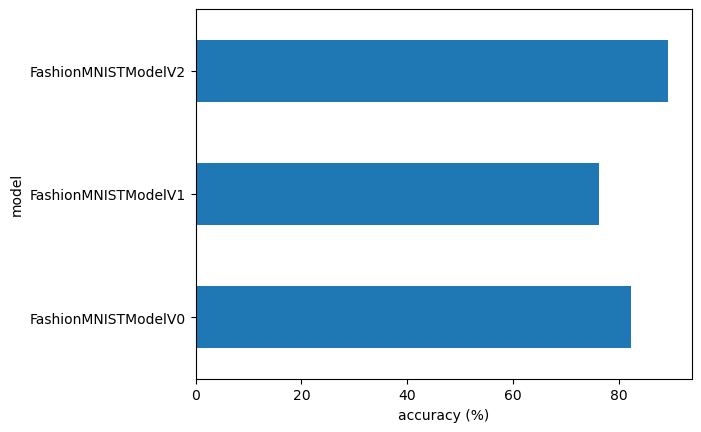

In [47]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [48]:
def make_predictions(model:torch.nn.Module,
                    data:list,
                    device:torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [49]:
import random
random.seed(41)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

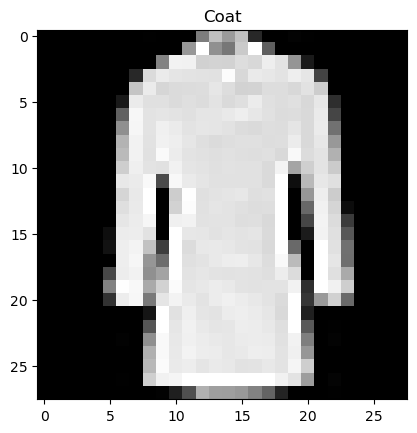

In [50]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [51]:
pred_probs = make_predictions(model=model_2, data=test_samples)
pred_probs[:2]

tensor([[1.2976e-02, 5.4239e-06, 1.4519e-02, 4.2648e-01, 4.7408e-01, 4.6627e-07,
         6.9599e-02, 2.4331e-05, 2.3047e-03, 4.6573e-06],
        [9.5903e-01, 1.0390e-05, 2.0616e-03, 2.1813e-03, 1.5942e-05, 8.6140e-08,
         3.6474e-02, 1.6899e-07, 2.2879e-04, 1.0375e-06]])

In [52]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([4, 0, 6, 8, 2, 7, 4, 0, 1]), [4, 0, 2, 8, 2, 7, 4, 0, 1])

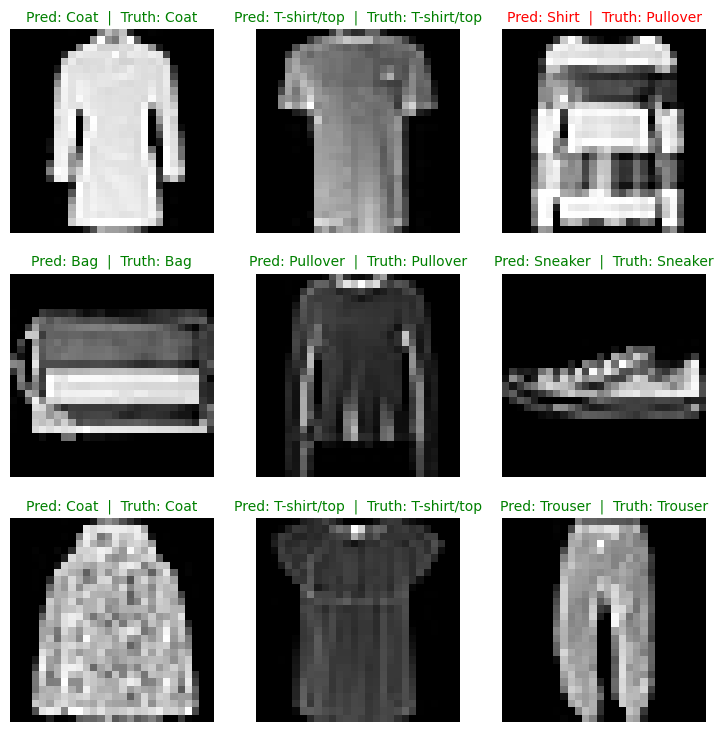

In [53]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    
    title_text = f"Pred: {pred_label}  |  Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
        
    plt.axis(False)

'0.22.0'

In [61]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
    
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [60]:
len(y_pred_tensor)

10000

In [66]:
try:
    import torchmetrics, mlxtend
    print(mlxtend.__version__)
    print(torchmetrics.__version__)
except:
    !pip install torchmetrics mlxtend
    import torchmetrics, mlxtend

0.22.0
1.0.3


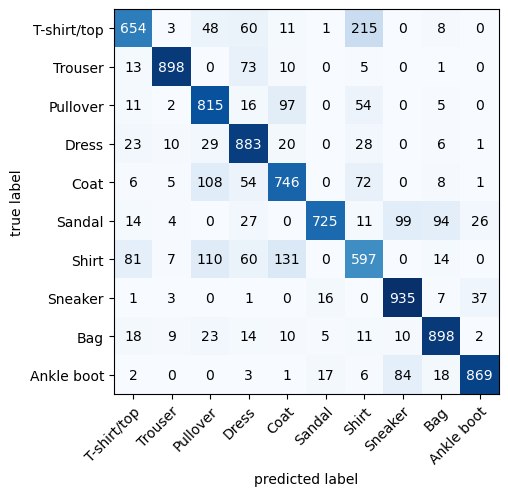

In [71]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(5,5)
)

In [72]:
confmat_tensor

tensor([[654,   3,  48,  60,  11,   1, 215,   0,   8,   0],
        [ 13, 898,   0,  73,  10,   0,   5,   0,   1,   0],
        [ 11,   2, 815,  16,  97,   0,  54,   0,   5,   0],
        [ 23,  10,  29, 883,  20,   0,  28,   0,   6,   1],
        [  6,   5, 108,  54, 746,   0,  72,   0,   8,   1],
        [ 14,   4,   0,  27,   0, 725,  11,  99,  94,  26],
        [ 81,   7, 110,  60, 131,   0, 597,   0,  14,   0],
        [  1,   3,   0,   1,   0,  16,   0, 935,   7,  37],
        [ 18,   9,  23,  14,  10,   5,  11,  10, 898,   2],
        [  2,   0,   0,   3,   1,  17,   6,  84,  18, 869]])

In [73]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\computer_vision_model_2.pth


In [74]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [75]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2957676649093628,
 'model_acc': 89.21725239616613}

In [76]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2957676649093628,
 'model_acc': 89.21725239616613}

In [77]:
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)